# Steam Games (2025)
Praca Domowa 6 Maciej Migasiuk



In [2]:



import pandas as pd
import numpy as np


a)

In [41]:
df = pd.read_csv('steam_games.csv')

df_shape = df.shape
print(f"Zbiór danych zawiera {df_shape[0]} wierszy i {df_shape[1]} kolumn.")

missing = df.isna().sum()
print("Liczba brakujących wartości w kolumnach:")
print(missing[missing > 0] if not missing[missing > 0].empty else "Brak brakujących wartości.")

print("Typy zmiennych:")
print(df.dtypes)


Zbiór danych zawiera 71429 wierszy i 21 kolumn.
Liczba brakujących wartości w kolumnach:
Brak brakujących wartości.
Typy zmiennych:
steam_appid              int64
name                    object
developers              object
publishers              object
categories              object
genres                  object
required_age             int64
n_achievements           int64
platforms               object
is_released               bool
release_date            object
additional_content      object
total_reviews            int64
total_positive           int64
total_negative           int64
review_score           float64
review_score_desc       object
positive_percentual    float64
metacritic               int64
is_free                   bool
price_initial (USD)    float64
dtype: object


b)

## 1. Statystyki opisowe zmiennych

Obliczenie podstawowych statystyk dla zmiennych numerycznych i jakościowych.


In [6]:
# Zmienne numeryczne
num_cols = df.select_dtypes(include=[np.number]).columns
print("Statystyki opisowe zmiennych numerycznych:")
print(df[num_cols].describe())

# Zmienne jakościowe
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
print("\nPodsumowanie zmiennych jakościowych:")
print(df[cat_cols].describe())



Statystyki opisowe zmiennych numerycznych:
        steam_appid  required_age  n_achievements  total_reviews  \
count  7.142900e+04  71429.000000    71429.000000   7.142900e+04   
mean   1.613700e+06      2.573227       16.079478   4.102497e+02   
std    8.625559e+05     13.591997      138.084319   8.389934e+03   
min    7.300000e+02      0.000000        0.000000   0.000000e+00   
25%    9.296400e+05      0.000000        0.000000   0.000000e+00   
50%    1.533470e+06      0.000000        0.000000   2.000000e+00   
75%    2.383530e+06      0.000000       16.000000   1.900000e+01   
max    3.430140e+06     97.000000     9821.000000   1.279700e+06   

       total_positive  total_negative  review_score  positive_percentual  \
count    7.142900e+04    71429.000000  71429.000000         71429.000000   
mean     3.602238e+02       50.025886      2.192849            46.113290   
std      7.409672e+03     1171.055349      3.175885            41.961702   
min      0.000000e+00        0.000000   

Mediana liczby recenzji (total_reviews) to 2, podczas gdy średnia to ok. 410 – większość gier ma bardzo mało opinii, a kilka hitów zawyża średnią.

Mediana pozytywnych (total_positive) i negatywnych (total_negative) recenzji to odpowiednio 2 i 0 – tylko nieliczne tytuły mają setki tysięcy ocen.

Ponad połowa gier (mediana) nie ma żadnych osiągnięć (n_achievements = 0), choć kilka produkcji oferuje ich tysiące.

Większość gier nie ma oceny Metacritic (mediana = 0), tylko garstka jest na tyle popularna wiekszość gier przechodzi bez echa.

Conajmniej 25% gier jest darmowych, a 75 % gier kosztuje maks. 9,99 USD – tylko pojedyncze tytuły są droższe (do ~1000 USD).

W kolumnie jakościowej „genres” najczęściej występuje Action oraz Indie, co oznacza ze te gatunki dominują rynek.

## 2. Analiza zmiennych numerycznych w podziale na grupy

Grupujemy dane według kolumny `is_free` (bezpłatne vs płatne gry) i obliczamy statystyki.


In [7]:
grouped = df.groupby('is_free')[['total_positive', 'total_negative', 'total_reviews', 'price_initial (USD)']].agg(['mean', 'median', 'min', 'max'])
print("Statystyki zmiennych numerycznych wg `is_free`:")
print(grouped)

Statystyki zmiennych numerycznych wg `is_free`:
        total_positive                     total_negative                     \
                  mean median min      max           mean median min     max   
is_free                                                                        
False       391.722097    3.0   0   531256      52.084318    1.0   0  101583   
True        155.983550    0.0   0  1107275      36.678646    0.0   0  172425   

        total_reviews                     price_initial (USD)              \
                 mean median min      max                mean median  min   
is_free                                                                     
False      443.806415    4.0   0   571834            7.534713   4.99  0.0   
True       192.662196    0.0   0  1279700            0.001673   0.00  0.0   

                 
            max  
is_free          
False    999.98  
True       9.99  


**Wniosek:** Darmowe gry (`is_free=True`) mają średnio mniej pozytywnych recenzji, ale większą liczbę maksymalną recenzji w porównaniu do gier płatnych.


## 3. Rozkład wartości zmiennej(`genres`)


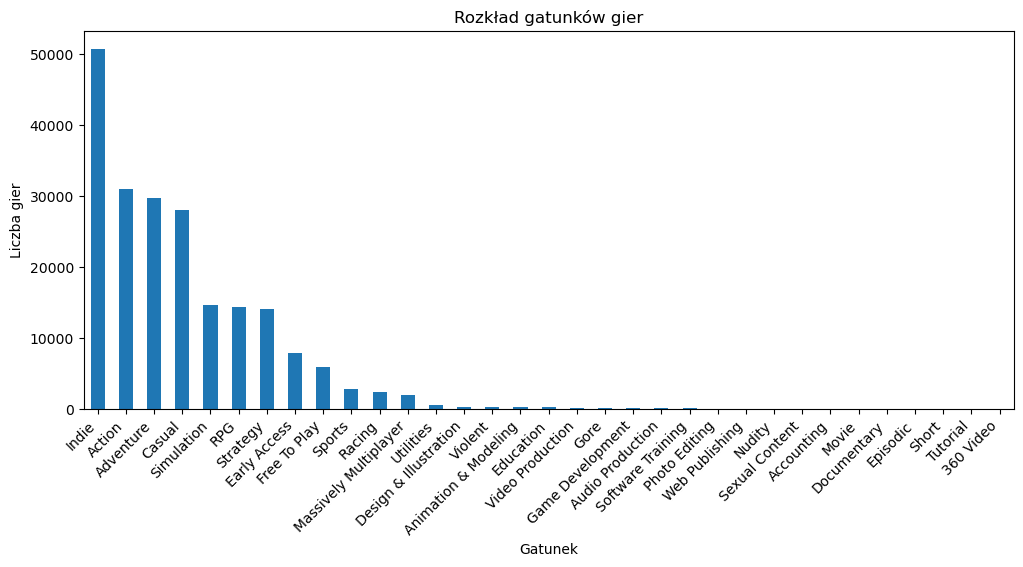

In [11]:
import pandas as pd
import ast
import matplotlib.pyplot as plt


df_genres = df[df['genres'].notna()].copy()


def parse_genres(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

df_genres['genre_list'] = df_genres['genres'].apply(parse_genres)

df_exploded = df_genres.explode('genre_list')
genre_counts = df_exploded['genre_list'].value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Rozkład gatunków gier')
plt.xlabel('Gatunek')
plt.ylabel('Liczba gier')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25)
plt.show()

**Wniosek:** Najwięcej gier to tytuły z gatunku Indie (ponad 50 000), co pokazuje ogromną popularność niezależnych produkcji na Steamie.

Po Indie, najliczniej reprezentowane są Action, Adventure i Casual (od ok. 28 000 do 31 000 gier), co świadczy o dominacji dynamicznych i przystępnych gier.

Gatunki takie jak Simulation, RPG i Strategy mają w przybliżeniu po 14 000 wystąpień, czyli stanowią solidną, ale znacznie mniejszą część biblioteki.

Kategorie związane z wczesnym dostępem („Early Access”, ok. 8 000) oraz modele darmowej gry („Free To Play”, ok. 5 000) również są istotne, choć już rzadsze.

Najmniej popularne gatunki (np. Accounting, Documentary, Short, 360 Video) występują jedynie w pojedynczych dziesiątkach tytułów co jest marginesem oferty Steam.

## 4. Zależności między wybranymi zmiennymi. Zależności między wybranymi zmiennymi


### 4.1 Recenzje pozytywne vs negatywne


C:\Users\User\AppData\Local\Temp\ipykernel_19156\89471667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['positive_bin'] = pd.cut(df_filtered['total_positive'],


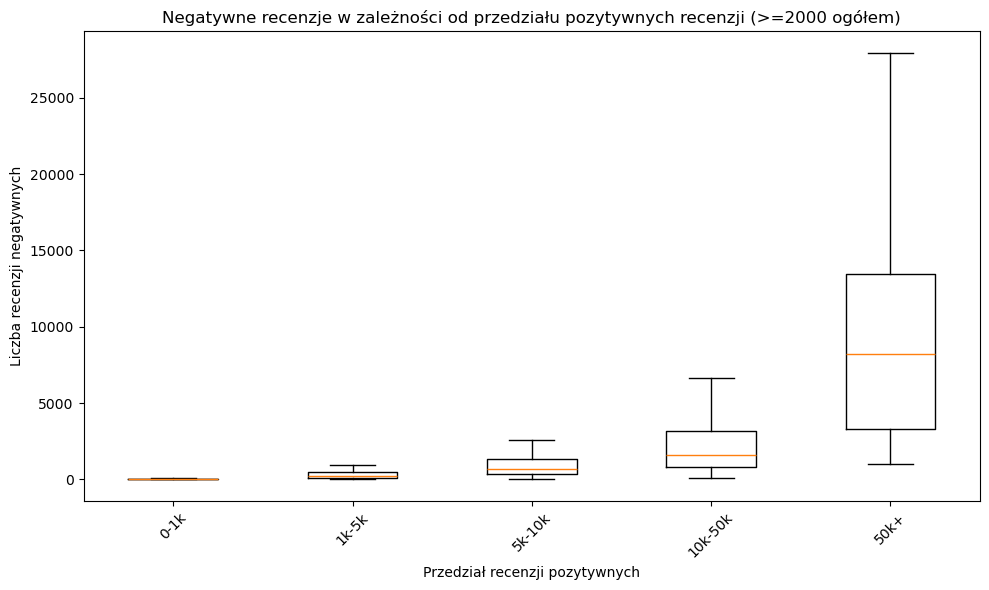

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df_filtered = df[df['total_reviews'] >= 20]
df_filtered['positive_bin'] = pd.cut(df_filtered['total_positive'], 
                                     bins=[0, 1000, 5000, 10000, 50000, df_filtered['total_positive'].max()],
                                     labels=['0-1k', '1k-5k', '5k-10k', '10k-50k', '50k+'])

groups = [group['total_negative'].values for name, group in df_filtered.groupby('positive_bin', observed=True)]
labels = ['0-1k', '1k-5k', '5k-10k', '10k-50k', '50k+']

plt.figure(figsize=(10,6))
plt.boxplot(groups, labels=labels, showfliers=False)
plt.title('Negatywne recenzje w zależności od przedziału pozytywnych recenzji (>=2000 ogółem)')
plt.xlabel('Przedział recenzji pozytywnych')
plt.ylabel('Liczba recenzji negatywnych')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Wniosek:** Istnieje silna korelacja między liczbą recenzji pozytywnych i negatywnych – popularne gry przyciągają zarówno pochwały, jak i krytykę. Zazwyczaj jednak na steam opinii negatywnych jest dużo mniej od tych pozytywnych.


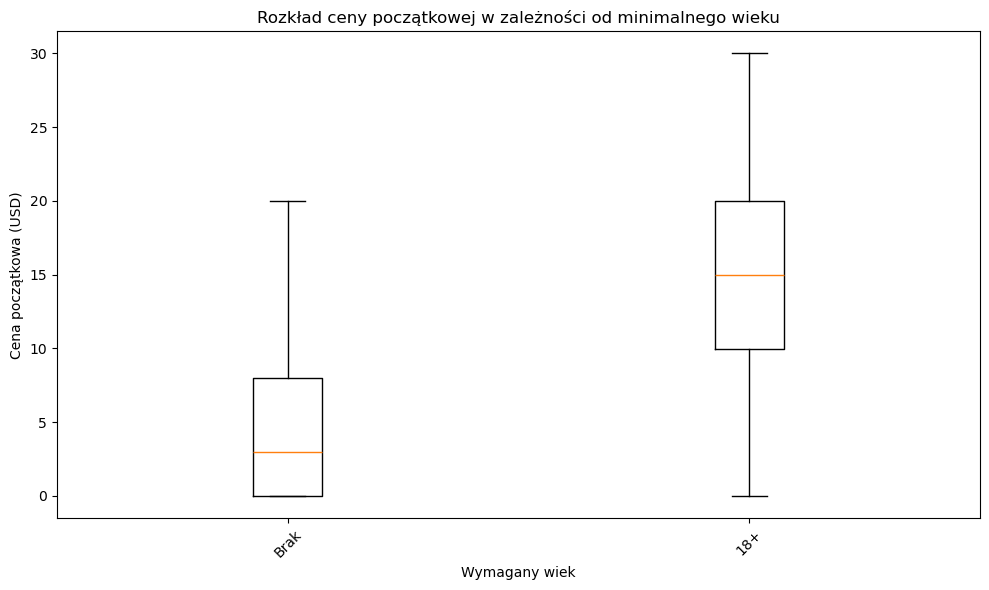

In [44]:
df_age_price = df.dropna(subset=['required_age', 'price_initial (USD)']).copy()

df_age_price['age_bin'] = pd.cut(df_age_price['required_age'], bins=[-1, 0, 12, 16, 18, 99], labels=['Brak', '0-12', '13-16', '17-18', '18+'])

groups_price = []
labels_age = []
for name, group in df_age_price.groupby('age_bin', observed=True):
    groups_price.append(group['price_initial (USD)'].values)
    labels_age.append(name)

plt.figure(figsize=(10,6))
plt.boxplot(groups_price, labels=labels_age, showfliers=False)
plt.title('Rozkład ceny początkowej w zależności od minimalnego wieku')
plt.xlabel('Wymagany wiek')
plt.ylabel('Cena początkowa (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Wniosek:** Wychodzi ze są tylko 2 kategorie wiekowe na steam. Gry dla młodszych odbiorców  mają zazwyczaj niższe ceny lub są darmowe, natomiast tytuły z ograniczeniami wiekowymi 18+ częściej pojawiają się w wyższych przedziałach cenowych.
